[Home](../README.md)

### Data Preprocessing


#### Load the required dependencies

Load the two required dependencies:

- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [3]:
data_frame = pd.read_csv("movies.csv")

#### Data Snapshot

It is important to get a high-level look at your dataset to understand what you are working with. Printing the complete data might be impossible for large-scale datasets where the rows can be in thousands or even millions.

I used the `head()` method call to inspect the first 5 rows of the dataset.

In [4]:
# Target = A measure of disease progression in one year
data_frame.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


####  Data Summary
 
The `info()` method call prints a summary of each column, giving more information about the specific data types, total number of rows, null values and memory usage.

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [6]:
data_frame.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


#### Graphically present the data

At this early stage I wanted to evaluate the data, the below simple plots lets me look at the data in different ways to inform my  model design and data wrangling approaches.

<Axes: >

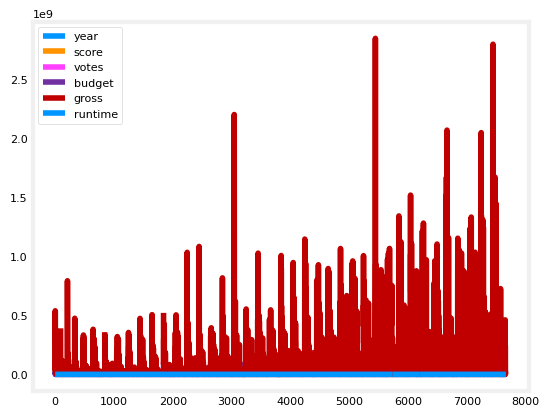

In [7]:
# plot a line graph 
data_frame.plot()

#### Distribution of Genres

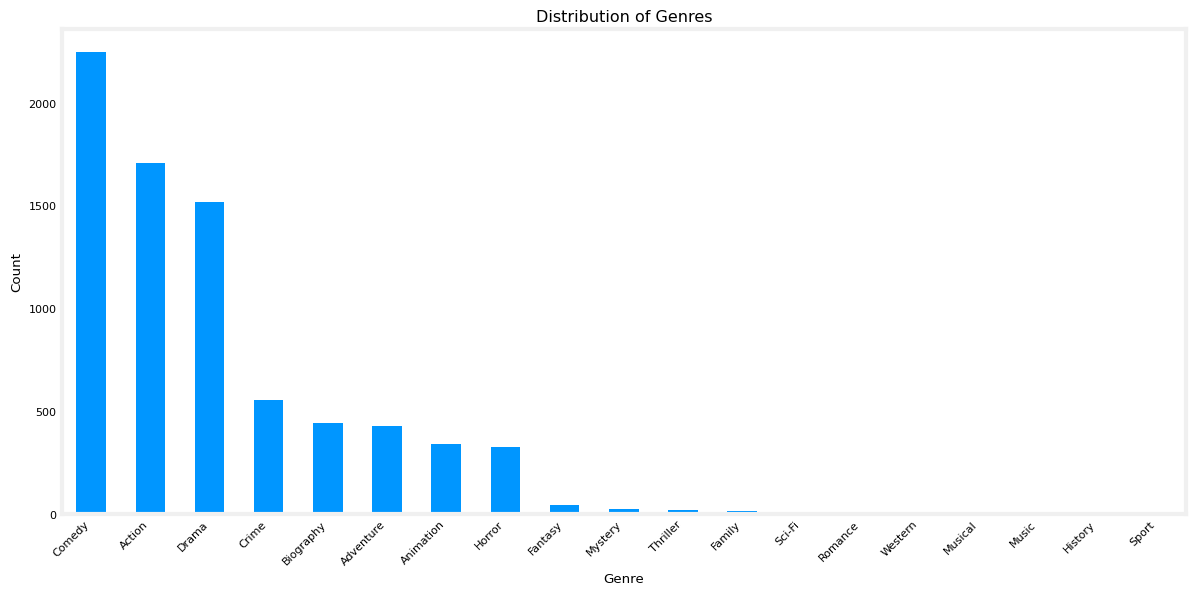

In [5]:
# Count occurrences of each genre
genre_counts = data_frame['genre'].value_counts()

# Plot a bar chart instead of a histogram
plt.figure(figsize=(12, 6))  # Increase figure size for readability
genre_counts.plot(kind='bar')
plt.title("Distribution of Genres")
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


This bar chart shows the distribution of movie genres in the dataset, with Comedy, Action, and Drama being the most frequent genres. Less common genres like Sport, History, and Musical have significantly fewer movies, indicating an imbalance in genre representation. This could impact model predictions if genre is a key feature.

#### Distribution of Movie Ratings

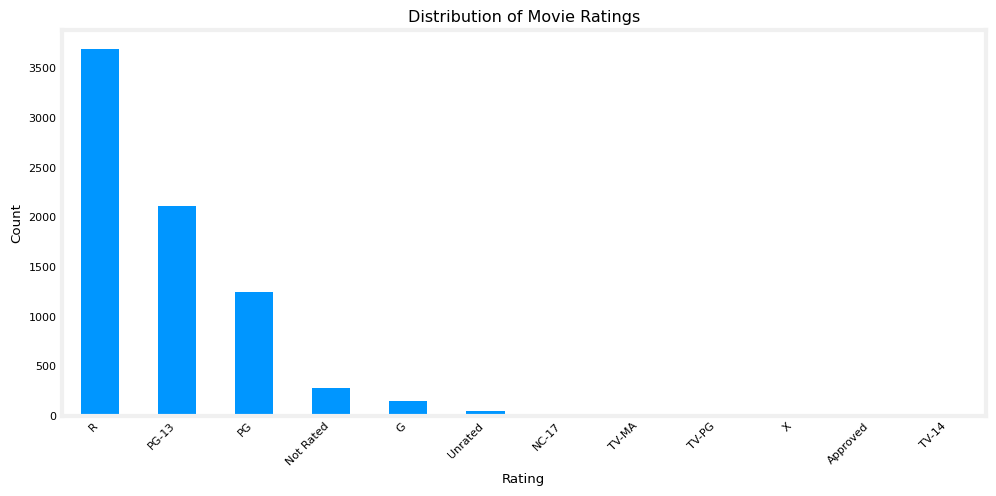

In [6]:
# Count occurrences of each rating
rating_counts = data_frame['rating'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 5))  # Adjust the size as needed
rating_counts.plot(kind='bar')
plt.title("Distribution of Movie Ratings")
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.tight_layout()
plt.show()


This bar chart shows the distribution of movie ratings in the dataset, with R-rated movies being the most frequent, followed by PG-13 and PG. Less common ratings like NC-17, TV-MA, and Approved have very few movies, indicating that the dataset is heavily skewed towards certain ratings. This could affect model predictions if rating is an important feature.

#### Budget Against Gross

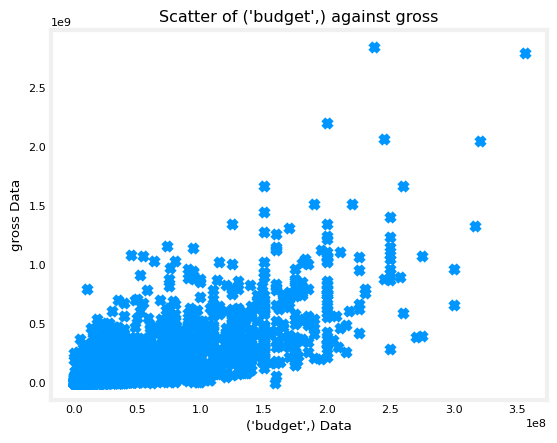

In [8]:
# Scatter plot multiples columns to see the relationship
x_plot = ['budget']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

This scatter plot visualizes the relationship between budget and gross revenue in the dataset. There is a noticeable positive correlation, meaning that higher-budget movies tend to generate more revenue. However, the spread of points suggests variability—some lower-budget films achieve high gross revenue, and some high-budget films underperform. Outliers, such as extremely high-grossing movies, indicate potential blockbuster successes.

#### Score

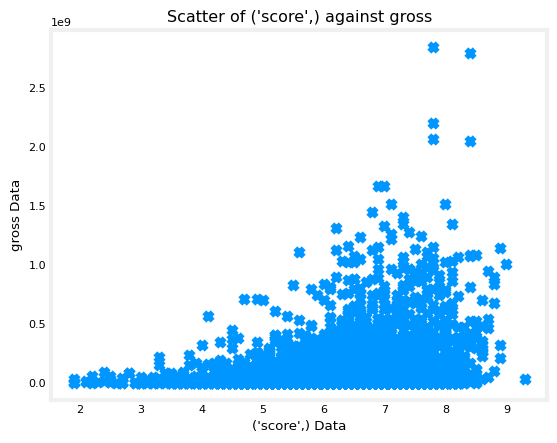

In [9]:
x_plot = ['score']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

This scatter plot visualizes the relationship between a movie's IMDb score (`score`) and its gross revenue (`gross`). The general upward trend suggests that higher-scoring movies tend to earn more, indicating a positive correlation. However, there is significant variance, especially at higher scores, showing that while a good score may contribute to higher revenue, it's not the sole determinant. Since my model is designed to predict movie revenue for future films in pre-production, the audience score feature wouldn't be included, as ratings from viewers are not available at that stage.

#### Votes

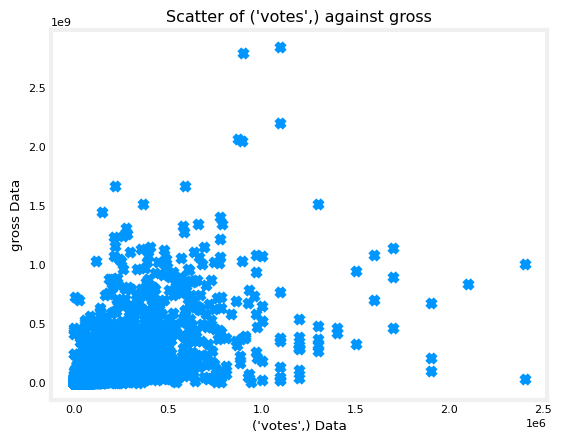

In [11]:
x_plot = ['votes']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

This scatter plot shows a weak positive correlation between the number of audience votes and gross revenue. While higher vote counts are somewhat associated with higher revenue, the wide spread and clustering at lower vote levels suggest that this feature may have limited predictive value for films in pre-production, where vote data is not yet available.


#### Runtime

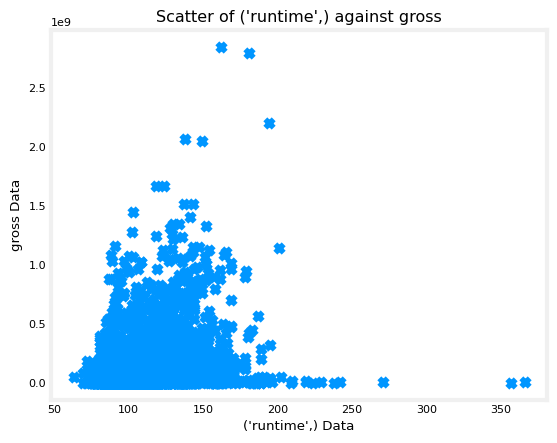

In [12]:
x_plot = ['runtime']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['gross'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['gross'].name}")
plt.ylabel(f'{data_frame['gross'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

This scatter plot suggests a slight positive correlation between a movie’s runtime and its gross revenue up to a certain point (around 150 minutes), after which the relationship weakens. Most high-grossing films tend to have runtimes between 90 and 150 minutes, indicating that extremely long or short films are less likely to perform well commercially.
